In [3]:
from graphviz import Digraph
import numpy as np

In [4]:
def edge_to_graph(dot, edge, **attr):    
    source_node, target_node = edge
    for index, (s, t) in enumerate(zip(source_node, target_node)):
        dot.node(str(s))
        dot.node(str(s))
        dot.edge(str(s), str(t), **attr)
    
    return dot

In [5]:
def edge_list_to_graph(dot, edge_list, colors=None,**attr):
    if colors is None:
        colors=["black"]
    for index, edge in enumerate(edge_list):
        edge_to_graph(dot, edge, color=colors[index%len(colors)], **attr)

In [4]:
edge = [[0, 1, 1, 1], [1, 2, 3, 4]]

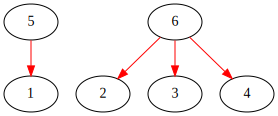

In [21]:
dot = Digraph()
edge_to_graph(dot, edge, color="red")
dot


In [6]:
def matrix_transfer(edge, i, j):
    # edge: [[i],[j]]
    edge_new = edge[:]
    edge_new[0] = [e+i for e in edge_new[0]]
    edge_new[1] = [e+j for e in edge_new[1]]
    return edge_new

In [7]:
def tensor_transfer(edge_list, num_nodes):
    n = num_nodes
    edge_nums = len(edge_list)
    loop_edge_list = []
    edge_start = 0
    for j in range(edge_nums):
        cur_edge_start = edge_start    
        for i in range(edge_nums):
            cur_edge_start %= edge_nums
            loop_edge_list.append(matrix_transfer(edge_list[cur_edge_start], i*n, j*n))
            print(f"{loop_edge_list}, {i}, {j}, {i*n}, {j*n}")
            cur_edge_start += 1
        edge_start-=1
    return loop_edge_list


In [15]:
num_nodes = 10
ast = [[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]]
dfg = [[1, 3], [3, 4]]
ncs = [[0], [5]]


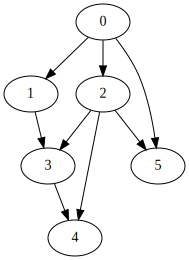

In [16]:
dot = Digraph()
edge_list=[ast, dfg, ncs]
edge_list_to_graph(dot, edge_list)
dot

[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]]], 0, 0, 0, 0
[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[11, 13], [3, 4]]], 1, 0, 10, 0
[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[11, 13], [3, 4]], [[20], [5]]], 2, 0, 20, 0
[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[11, 13], [3, 4]], [[20], [5]], [[0], [15]]], 0, 1, 0, 10
[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[11, 13], [3, 4]], [[20], [5]], [[0], [15]], [[10, 10, 12, 12, 12], [11, 12, 13, 14, 15]]], 1, 1, 10, 10
[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[11, 13], [3, 4]], [[20], [5]], [[0], [15]], [[10, 10, 12, 12, 12], [11, 12, 13, 14, 15]], [[21, 23], [13, 14]]], 2, 1, 20, 10
[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[11, 13], [3, 4]], [[20], [5]], [[0], [15]], [[10, 10, 12, 12, 12], [11, 12, 13, 14, 15]], [[21, 23], [13, 14]], [[1, 3], [23, 24]]], 0, 2, 0, 20
[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[11, 13], [3, 4]], [[20], [5]], [[0], [15]], [[10, 10, 12, 12, 12], [11, 12, 13, 14, 15]], [[21, 23], [13, 14]], [[1, 3], [23, 24]], [[10], [25]]], 1, 2, 10, 20
[[[0, 0, 2,

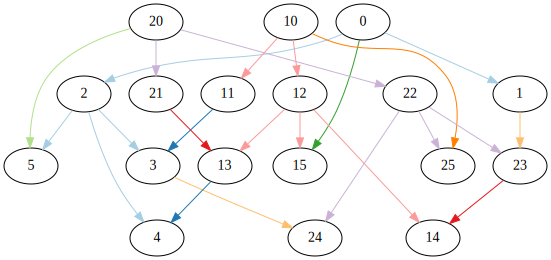

In [18]:
dot = Digraph()
tensor_edge = tensor_transfer(edge_list, num_nodes=num_nodes)
edge_list_to_graph(dot, tensor_edge, colors=["/paired12/"+str(i) for i in range(1, 13)])
dot

In [41]:
edge_list

[[[0, 0, 2, 2, 2], [1, 2, 3, 4, 5]], [[1], [3]]]